In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns


In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
646,-122.13,37.72,35.0,2183.0,383.0,976.0,392.0,3.8393,NEAR BAY,243500.0
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,ISLAND,300000.0
2778,-115.73,33.35,23.0,1586.0,448.0,338.0,182.0,1.2132,INLAND,30000.0
18204,-122.05,37.38,24.0,2424.0,501.0,1367.0,507.0,4.0720,<1H OCEAN,364200.0
11102,-117.88,33.85,26.0,3924.0,781.0,2332.0,725.0,3.7772,<1H OCEAN,223900.0
...,...,...,...,...,...,...,...,...,...,...
6726,-118.11,34.12,52.0,2954.0,371.0,1152.0,347.0,11.5609,<1H OCEAN,500001.0
15935,-122.41,37.73,41.0,2115.0,378.0,1168.0,365.0,4.0642,NEAR BAY,272500.0
148,-122.22,37.80,52.0,2286.0,464.0,1073.0,441.0,3.0298,NEAR BAY,199600.0
9555,-120.65,37.33,25.0,1731.0,311.0,810.0,266.0,4.1058,INLAND,107600.0


In [7]:
train_data = X_train.join(y_train) # the result of this only shows the result of the training data



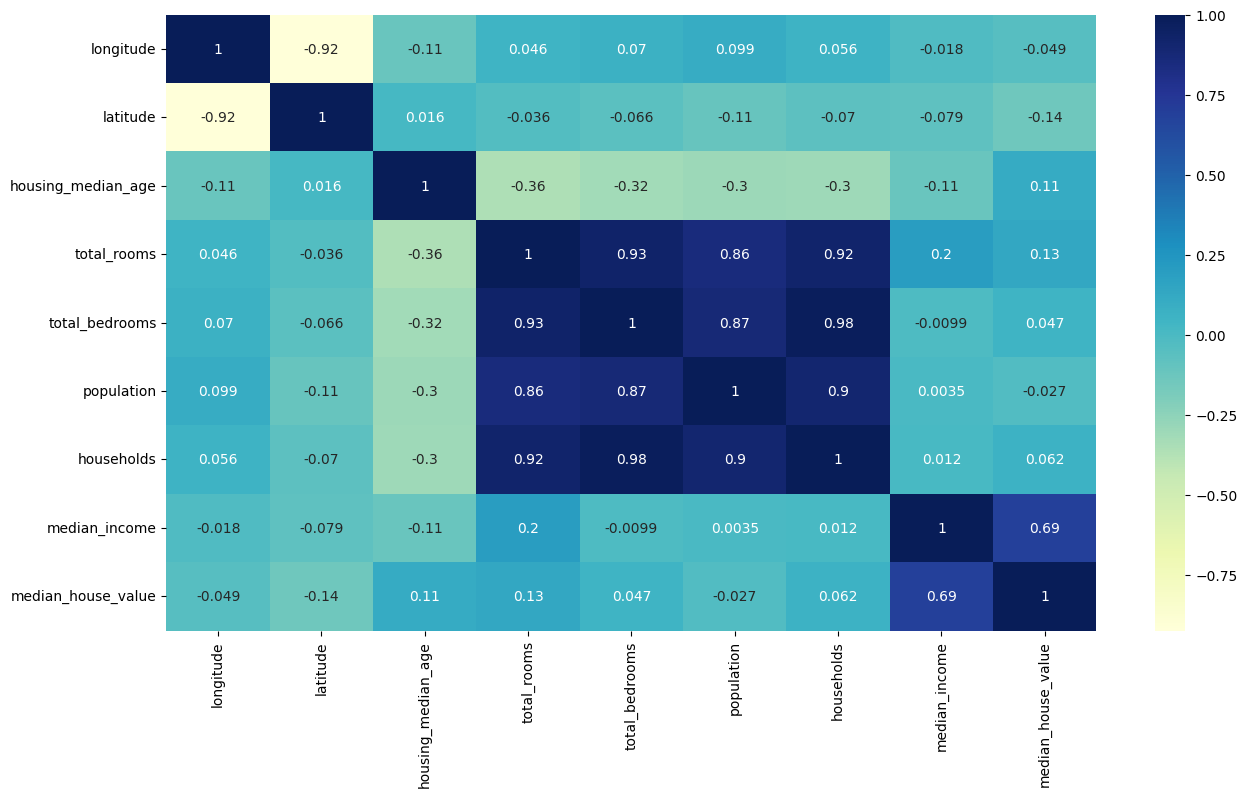

In [8]:
train_data_numeric = train_data.drop(columns=['ocean_proximity'])

plt.figure(figsize=(15,8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap="YlGnBu")
plt.show()
#======= END OF DATA EXPLORATION ========#

In [9]:
# GOAL to convert the categorical data on column (ocean_proximity) to binary
pd.get_dummies(train_data.ocean_proximity)
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
# train_data = train_data.join(category_vars)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
646,-122.13,37.72,35.0,2183.0,383.0,976.0,392.0,3.8393,243500.0,False,False,False,True,False
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,False,False,True,False,False
2778,-115.73,33.35,23.0,1586.0,448.0,338.0,182.0,1.2132,30000.0,False,True,False,False,False
18204,-122.05,37.38,24.0,2424.0,501.0,1367.0,507.0,4.0720,364200.0,True,False,False,False,False
11102,-117.88,33.85,26.0,3924.0,781.0,2332.0,725.0,3.7772,223900.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726,-118.11,34.12,52.0,2954.0,371.0,1152.0,347.0,11.5609,500001.0,True,False,False,False,False
15935,-122.41,37.73,41.0,2115.0,378.0,1168.0,365.0,4.0642,272500.0,False,False,False,True,False
148,-122.22,37.80,52.0,2286.0,464.0,1073.0,441.0,3.0298,199600.0,False,False,False,True,False
9555,-120.65,37.33,25.0,1731.0,311.0,810.0,266.0,4.1058,107600.0,False,True,False,False,False


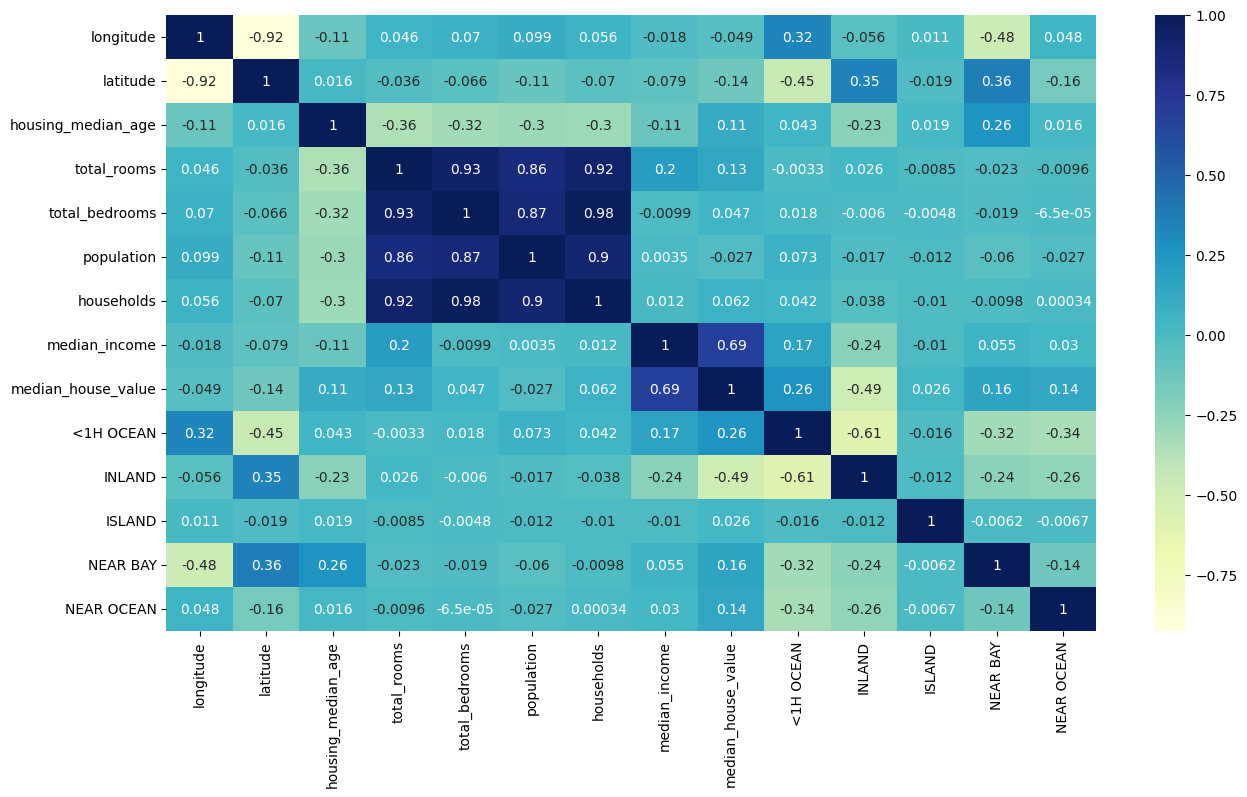

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

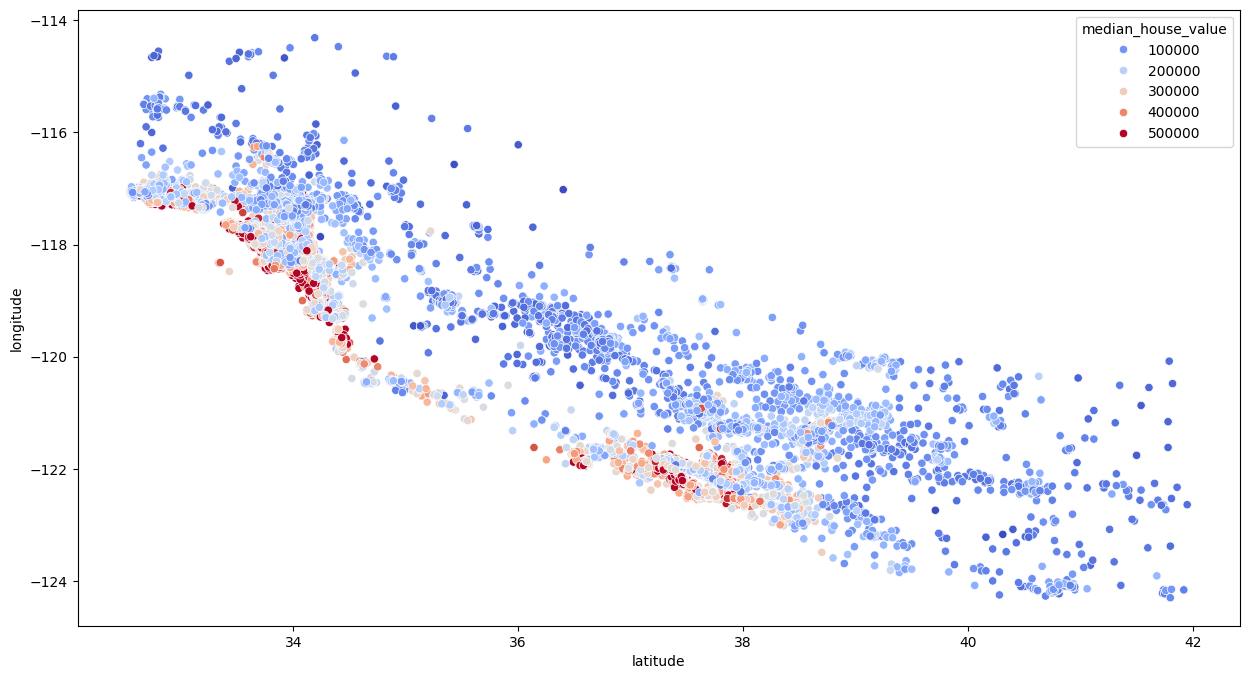

In [11]:
# Visualise the data on scatter plot
plt.figure(figsize=(15,8))
sns.scatterplot(x=train_data.latitude, y=train_data.longitude, hue=train_data.median_house_value, palette="coolwarm")

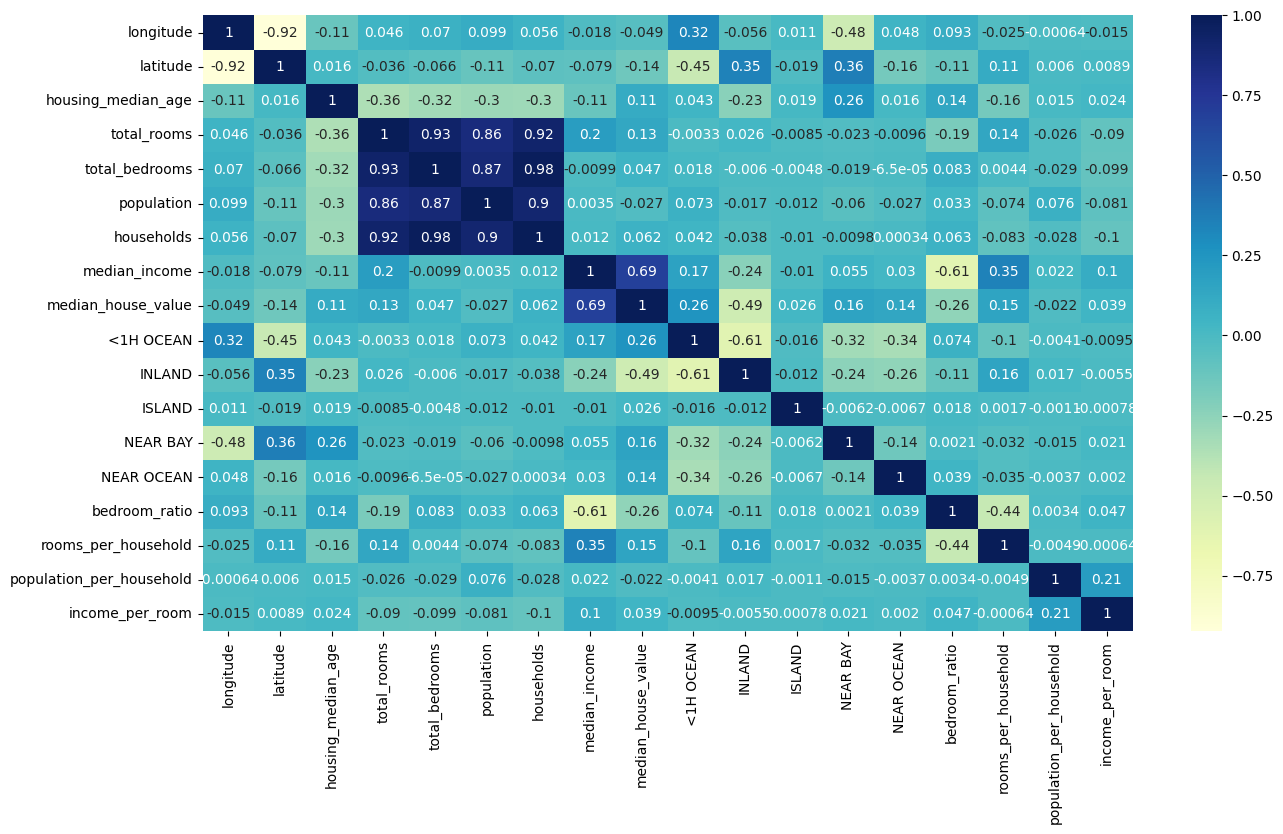

In [12]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']
train_data['population_per_household'] = train_data['population'] / train_data['households']
train_data['income_per_room'] = train_data['median_income'] / train_data['total_rooms']

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [15]:


X_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

model = LinearRegression()

model.fit(X_train, y_train)

test_data = X_train.join(y_test)
# test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households']
test_data['population_per_household'] = test_data['population'] / test_data['households']
test_data['income_per_room'] = test_data['median_income'] / test_data['total_rooms']

X_test, y_test = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

score = model.score(X_test, y_test)
print("Linear Regression R² score:", score)




Linear Regression R² score: 0.6547525580593714


In [16]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
score = forest.score(X_test, y_test)
print("Random Forest R² score:", score)

#======== Gradient Boosting Regressor =========#

gradient_boost = GradientBoostingRegressor(
    n_estimators=100,            
    learning_rate=0.1,           
    max_depth=3,                 
    random_state=42,             
    validation_fraction=0.1,     
    n_iter_no_change=10          
)

gradient_boost.fit(X_train, y_train)

score = gradient_boost.score(X_test, y_test)
print("Gradient Boosting R² score:", score)


Random Forest R² score: 0.9744809196966069
Gradient Boosting R² score: 0.804127292285343
